In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [321]:
# Load the data
pokemon = pd.read_csv('pokemon.csv')


In [323]:
#Get the info about Data
pokemon.info()
pokemon.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [325]:
#Check total number of null value each column
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [327]:
#Drop column with many null values
pokemon = pokemon.drop('Type 2', axis=1)
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 69.7+ KB


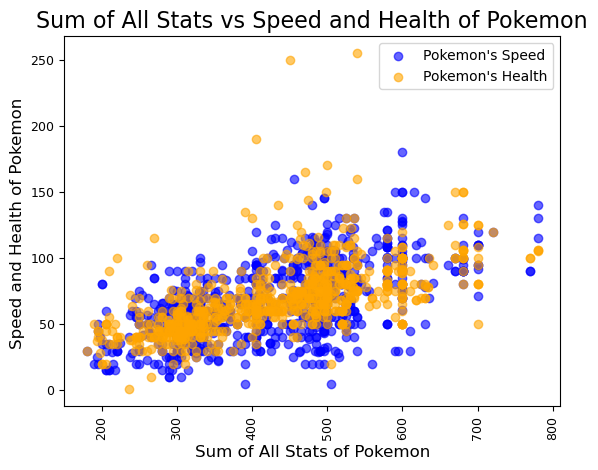

In [393]:
#creating a plot 

plt.scatter(pokemon['Total'], pokemon['Speed'], color='blue',alpha=0.6)
plt.scatter(pokemon['Total'], pokemon['HP'], color='orange',alpha=0.6)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel('Sum of All Stats of Pokemon',fontsize=12)
plt.ylabel('Speed and Health of Pokemon ',fontsize=12)
plt.title('Sum of All Stats vs Speed and Health of Pokemon',fontsize=16)
plt.xticks(rotation = 90, fontsize=9)
plt.yticks(fontsize=9)
#plt.figure(figsize=(80, 80), dpi=80)
plt.legend(["Pokemon's Speed","Pokemon's Health"])
plt.savefig('scatter.png',dpi=400)


In [333]:
attack=pokemon['Attack']
defense=pokemon['Defense']
sp_attack=pokemon['Sp. Atk']
sp_defense=pokemon['Sp. Def']
types=pokemon['HP']

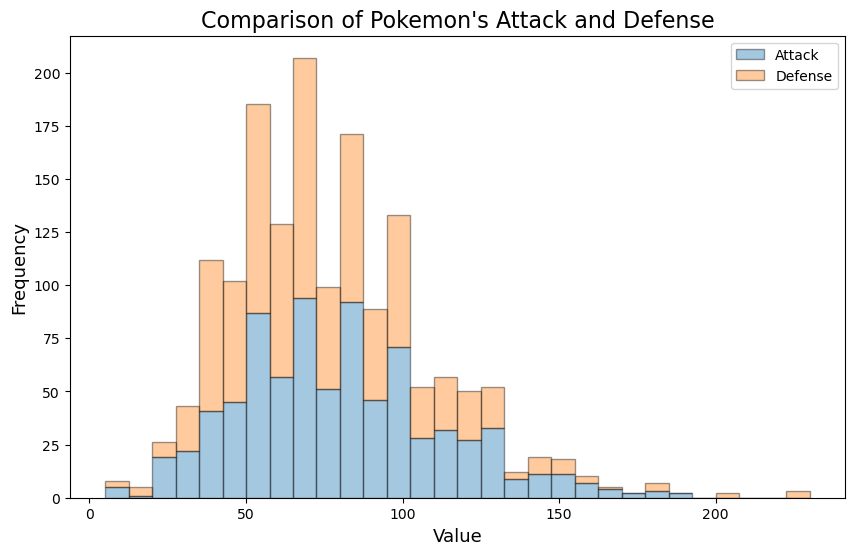

In [385]:
plt.figure(figsize=(10, 6))  # Set figure size

# Plot histogram for comparing attack vs defense
plt.hist([attack,defense], bins=30, edgecolor="black", alpha=0.4,stacked=True,label=['Attack', 'Defense','HP'])

# Add labels and title
plt.xlabel("Value",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
plt.title("Comparison of Pokemon's Attack and Defense",fontsize=16)


# Add legend
plt.legend()
plt.savefig('attack_vs.png',dpi=400)
# Show the plot
#plt.show()


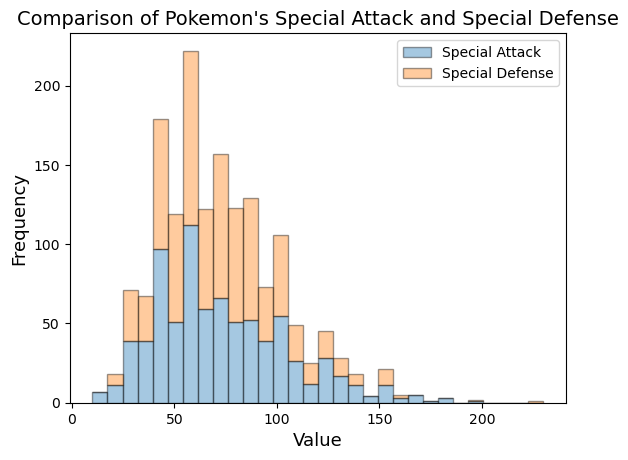

In [391]:
#plt.figure(figsize=(10, 6))  # Set figure size

# Plot histogram for Special Attack vs Special Defense
plt.hist([sp_attack,sp_defense], bins=30, edgecolor="black", alpha=0.4,stacked=True,label=['Special Attack','Special Defense'])

# Add labels and title
plt.xlabel("Value",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
plt.title("Comparison of Pokemon's Special Attack and Special Defense",fontsize=14)


# Add legend
plt.legend()

# Show the plot
#plt.show()
plt.savefig('special.png',)



In [339]:
corr_matrix_data = pokemon.drop(columns=['Name','Type 1','#'])
corr_matrix=corr_matrix_data.corr()
print(corr_matrix)

               Total        HP    Attack   Defense   Sp. Atk   Sp. Def  \
Total       1.000000  0.618748  0.736211  0.612787  0.747250  0.717609   
HP          0.618748  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.736211  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.612787  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp. Atk     0.747250  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp. Def     0.717609  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.575943  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.048384  0.058683  0.051451  0.042419  0.036437  0.028486   
Legendary   0.501758  0.273620  0.345408  0.246377  0.448907  0.363937   

               Speed  Generation  Legendary  
Total       0.575943    0.048384   0.501758  
HP          0.175952    0.058683   0.273620  
Attack      0.381240    0.051451   0.345408  
Defense     0.015227    0.042419   0.246377  
Sp. Atk     0.473018    0.036

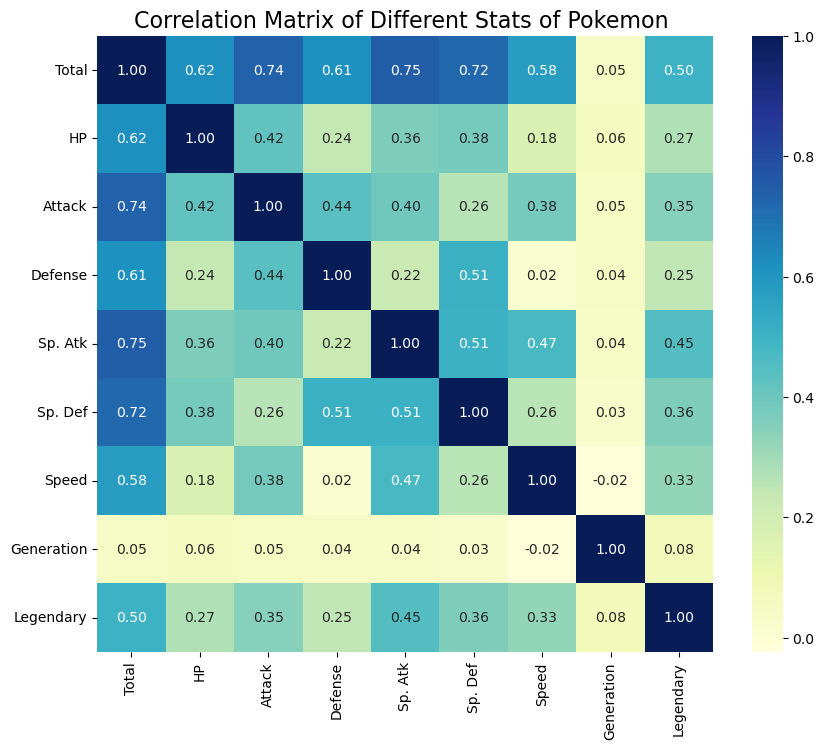

In [383]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", square=True, fmt=".2f")

# Add title
plt.title("Correlation Matrix of Different Stats of Pokemon ",fontsize=16)

# Show plot
#plt.show()
plt.savefig('heat.png',dpi=400)